# RGB to Grayscale Using Auto-encoder

**I have used flower color images from kaggle dataset. You can download and extract it to current directory from [here](https://www.kaggle.com/olgabelitskaya/flower-color-images)**

-> flower_images/*.png

# Dataset Information
**It consists of 210 total image data. (I could have used bigger dataset but unfortunately my internet is too slow today.)**<br>
**The image shape is (128,128,3)**

# Objective
**To convert RGB images to Grayscale using Neural Network**<br>

# Autoencoders
**An autoencoder is a type of artificial neural network used to learn efficient data codings in an unsupervised manner. The aim of an autoencoder is to learn a representation (encoding) for a set of data, typically for dimensionality reduction, by training the network to ignore signal “noise”.<br>
Here we have used CNN to learn features and target the grayscale images**

# [1]. Importing Libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.utils import plot_model,to_categorical
import os
import cv2
from keras.layers import UpSampling2D,Input
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

Using TensorFlow backend.


# [2].Creating Dataset for this requirement

In [145]:
input_images=[]             # List of all input images
target_images=[]            # List of all output images
for i,image in enumerate(os.listdir('flower_images')):               # Iterating through downloaded dataset
    if image[-3:]=='png':        
        img=cv2.imread('flower_images/'+image)
        img=np.resize(img,(128,128,3))                               # Resizing all images to required Size
        img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)                      # OpenCv reads image in BGR format. Here we convert to RGB
        
        img1=img/255.0                                               # Normalizing mage (Important)
        #print(img1.shape)
        input_images.append(img1)                                    # Adding Image to list
        img2=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)                    # Converting RGB to GRAY
        img2=img2/255.0
        target_images.append(img2)                                   # Adding img to output list
        #print(img2.shape)

In [146]:
total_output=np.array(target_images)[:,:,:,np.newaxis]               # Shape of GRAY img is (128,128). We add new axis
                                                                     # New shape (128,128,1)
total_input=np.array(input_images)                                   # Converting it to array

In [147]:
total_output.shape

(210, 128, 128, 1)

**Image in RGB**

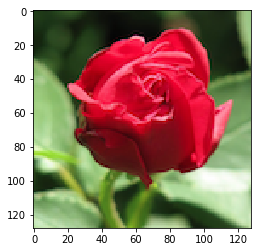

In [5]:
plt.imshow(input_images[100],cmap='gray')

**Target image in GRAY**

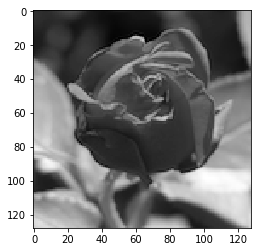

In [11]:
plt.imshow(np.reshape(y_train[100],(128,128)),cmap='gray')

# [3]. Creating Model

### I tried various architecture with different loss and optimizer and below configuration worked out the best.

In [161]:
def autoencoder():
    model=Sequential()
    
    #Encoder
    model.add(Conv2D(64,3,padding='same',activation='relu',input_shape=(128,128,3)))
    model.add(MaxPooling2D((2,2),padding='same'))
    #Decoder
    model.add(UpSampling2D(size=(2,2)))
    model.add(Conv2D(1,2,padding='same',activation='relu'))


    print(model.summary())
    return model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_69 (Conv2D)           (None, 128, 128, 64)      1792      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
up_sampling2d_31 (UpSampling (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 128, 128, 1)       257       
Total params: 2,049
Trainable params: 2,049
Non-trainable params: 0
_________________________________________________________________


In [163]:
model=autoencoder()
import time

start = time.time()
batchSize = 5
trainingEpochs = 40

model.compile(optimizer='adam', loss='mean_squared_error',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

trainingHistory = model.fit(total_input, total_output, batch_size=batchSize, 
                            epochs=trainingEpochs,
                            validation_split=0.2,                            
                            callbacks=[early_stopping], 
                            shuffle=True,)

trainingAccuracy = trainingHistory.history['acc']
validationAccuracy = trainingHistory.history['val_acc']

end = time.time()
print("*Net Time : ", (end-start)/60, ' mins...')

Train on 168 samples, validate on 42 samples
Epoch 1/40
168/168 [==============================] - 2s 12ms/step - loss: 0.0299 - acc: 0.0055 - val_loss: 0.0125 - val_acc: 0.0052
Epoch 2/40
168/168 [==============================] - 1s 5ms/step - loss: 0.0066 - acc: 0.0060 - val_loss: 0.0058 - val_acc: 0.0062
Epoch 3/40
168/168 [==============================] - 1s 5ms/step - loss: 0.0038 - acc: 0.0063 - val_loss: 0.0045 - val_acc: 0.0063
Epoch 4/40
168/168 [==============================] - 1s 5ms/step - loss: 0.0030 - acc: 0.0064 - val_loss: 0.0036 - val_acc: 0.0064
Epoch 5/40
168/168 [==============================] - 1s 5ms/step - loss: 0.0024 - acc: 0.0064 - val_loss: 0.0032 - val_acc: 0.0064
Epoch 6/40
168/168 [==============================] - 1s 5ms/step - loss: 0.0021 - acc: 0.0064 - val_loss: 0.0030 - val_acc: 0.0064
Epoch 7/40
168/168 [==============================] - 1s 5ms/step - loss: 0.0019 - acc: 0.0064 - val_loss: 0.0027 - val_acc: 0.0064
Epoch 8/40
168/168 [==========

In [219]:
model.save_weights('model_weights.h5')

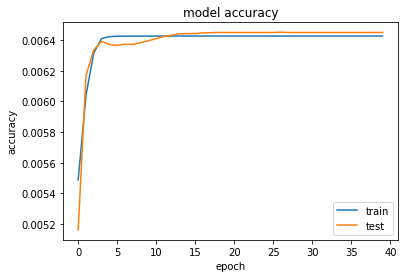

In [173]:
plt.plot(trainingHistory.history['acc'])
plt.plot(trainingHistory.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

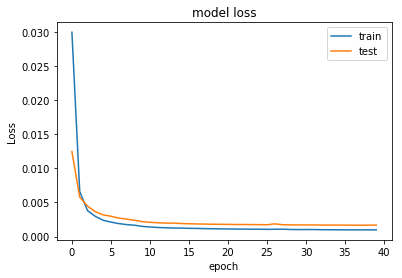

In [174]:
plt.plot(trainingHistory.history['loss'])
plt.plot(trainingHistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# [4] Prediction

In [183]:
idx=15
image=total_input[idx]                              # Sample Image
output=total_output[idx]
img2=model.predict(image.reshape(1,128,128,3))

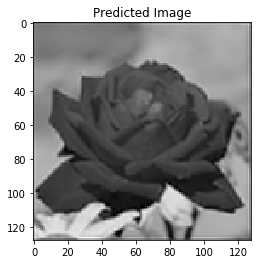

In [184]:
plt.imshow(np.reshape(img2,(128,128)),cmap='gray')
plt.title('Predicted Image')
plt.show()

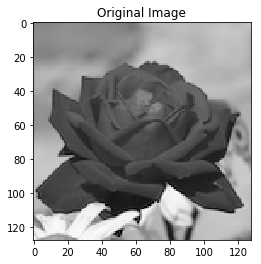

In [185]:
plt.imshow(np.reshape(output,(128,128)),cmap='gray')
plt.title('Original Image')
plt.show()

In [217]:
def plot_images(no_images,images,images_output):
    #fig,ax=plt.subplot((3,3))
#     fig=plt.figure()
#     for i,(img,ax) in enumerate(zip(images,ax)):
#         ax.imshow(img)
#         ax.title('Original')
#         predicted=model.predict(img.reshape(1,128,128,3))
#         ax.imshow(predicted)
#         ax.title
    for j in range(no_images):
        for i in range(1,4):
            plt.subplot(1,3,i)
            if i%3==1:
                plt.imshow(images[j],cmap='gray')
                plt.title('Original')
                
            if i%3==2:
                predicted=model.predict(images[j].reshape(1,128,128,3))
                plt.imshow(np.reshape(predicted,(128,128)),cmap='gray')
                plt.title('Predicted')
                
            if i%3==0:
                plt.imshow(np.reshape(images_output[j],(128,128)),cmap='gray')
                plt.title('Target')
                plt.show()

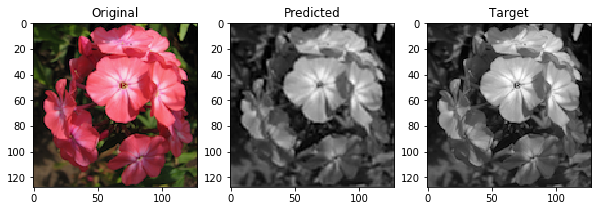

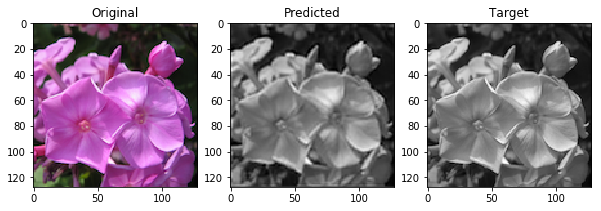

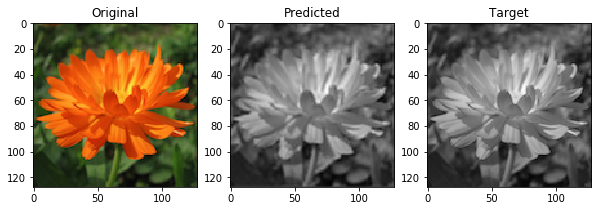

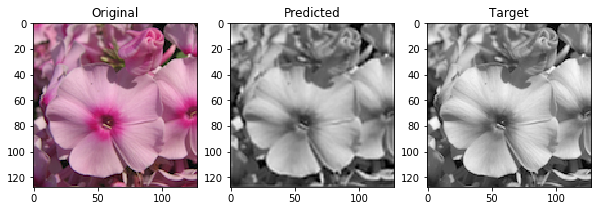

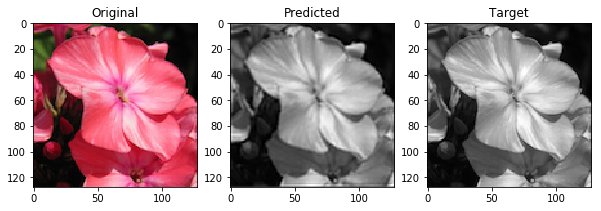

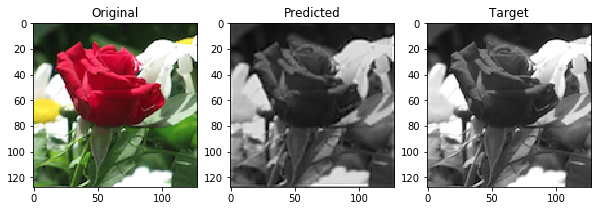

In [218]:
plot_images(6,total_input[:7],total_output[:7])

# [5] Conclusion

### We got grayscale images after using 1 level deep of autoencoder.
### More Deep level autoencoder increases the losss.
### We can increase the decrease the loss by increasing trainning data or trying different hyperparameters.
### Sharpness can be increased by extra techniques.